# Step1: Importing the libraries

In [38]:
# Stock Market ML Predictions - Multi-Company Analysis

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [40]:
print("# Machine Learning Stock Predictions - Multi-Company Analysis")

# 1. Load the processed data from your EDA
print("\n## 1. Loading processed data")

# Machine Learning Stock Predictions - Multi-Company Analysis

## 1. Loading processed data


In [41]:
# Load the saved data - adjust path if needed
df = pd.read_csv('processed_stock_data.csv')
print(f"Loaded data with {len(df)} rows and {len(df.columns)} columns")

Loaded data with 3774 rows and 72 columns


In [42]:
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display a sample of the data
print("\nSample of the loaded data:")
print(df.head())


Sample of the loaded data:
            Close_AAPL  Close_AMZN  Close_GOOGL  Close_MSFT  Close_NVDA  \
Date                                                                      
2010-01-04    6.440330      6.6950    15.609805   23.254051    0.423884   
2010-01-05    6.451465      6.7345    15.541064   23.261557    0.430073   
2010-01-06    6.348847      6.6125    15.149294   23.118809    0.432824   
2010-01-07    6.337109      6.5000    14.796624   22.878376    0.424342   
2010-01-08    6.379242      6.6760    14.993881   23.036165    0.425259   

            High_AAPL  High_AMZN  High_GOOGL  High_MSFT  High_NVDA  ...  \
Date                                                                ...   
2010-01-04   6.455075     6.8305   15.678546  23.366752   0.426864  ...   
2010-01-05   6.487878     6.7740   15.636953  23.366746   0.434658  ...   
2010-01-06   6.477046     6.7365   15.587638  23.351725   0.433741  ...   
2010-01-07   6.379842     6.6160   15.192630  23.066212   0.432366  ...

In [43]:
# Define the companies we want to analyze
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']
print(f"\nAnalyzing all companies: {', '.join(companies)}")


Analyzing all companies: AAPL, AMZN, GOOGL, MSFT, NVDA


In [44]:
# Function to prepare data for modeling
def prepare_prediction_data(df, feature_cols, target_col, pred_horizon=1):
    """
    Prepare data for ML prediction with a prediction horizon
    
    Parameters:
    df: DataFrame with stock data
    feature_cols: List of feature column names
    target_col: Column name for target variable (e.g., 'Return_NVDA')
    pred_horizon: Number of days ahead to predict (default: 1)
    
    Returns:
    X: Feature DataFrame
    y: Target Series
    """
    # Create a copy of the features
    X = df[feature_cols].copy()
    
    # Target is future return (1 day ahead by default)
    y = df[target_col].shift(-pred_horizon)
    
    # Drop rows with NaN in X or y
    valid_idx = ~(X.isna().any(axis=1) | y.isna())
    X = X.loc[valid_idx]
    y = y.loc[valid_idx]
    
    return X, y


In [45]:
# Function to evaluate ML models
def evaluate_ml_model(X_train, X_test, y_train, y_test, model_name, model_instance):
    """
    Train and evaluate a machine learning model
    
    Returns:
    Dict with model performance metrics and predictions
    """
    # Train the model
    model_instance.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_instance.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # For RandomForest, get feature importance if available
    feature_importance = None
    if hasattr(model_instance, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model_instance.feature_importances_
        }).sort_values('Importance', ascending=False)
    
    return {
        'model_name': model_name,
        'predictions': y_pred,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'feature_importance': feature_importance
    }

In [46]:
# Function to calculate trading strategy metrics
def calculate_strategy_metrics(returns):
    """Calculate performance metrics for a returns series"""
    # Convert to numpy for calculations
    returns_array = returns.values
    
    # Cumulative return
    cumulative = (1 + returns/100).cumprod().iloc[-1] - 1
    
    # Calculate annualized return (assuming 252 trading days)
    n_days = len(returns)
    ann_return = ((1 + cumulative) ** (252/n_days) - 1)
    
    # Calculate volatility (annualized)
    volatility = returns.std() * np.sqrt(252)
    
    # Sharpe ratio (assuming 0 risk-free rate for simplicity)
    sharpe = ann_return / volatility if volatility > 0 else 0
    
    # Win rate (% of positive return days)
    win_rate = (returns > 0).mean() * 100
    
    return {
        'Cumulative Return (%)': cumulative * 100,
        'Annualized Return (%)': ann_return * 100,
        'Annualized Volatility (%)': volatility,
        'Sharpe Ratio': sharpe,
        'Win Rate (%)': win_rate
    }




## 2. Analyzing each company

### Analyzing AAPL
Using features: Return_AAPL, Volatility_AAPL, Range_Pct_AAPL, MA20_AAPL, MA50_AAPL, MA200_AAPL, RSI_AAPL, Beta_AAPL, Day_of_Week, Month, Quarter

Random Forest: RMSE=1.8951, R²=-0.2564
XGBoost: RMSE=1.8280, R²=-0.1690


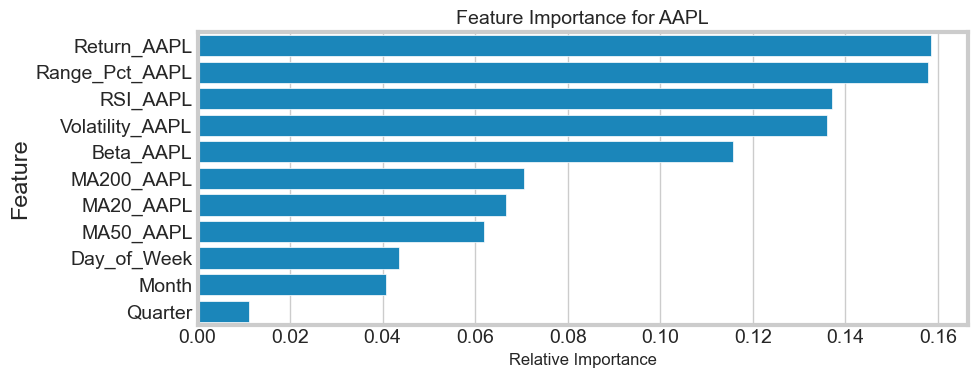


Strategy Performance:
                           Buy & Hold  RandomForest  XGBoost
Cumulative Return (%)           64.29        -36.12   -12.27
Annualized Return (%)           19.42        -14.80    -4.57
Annualized Volatility (%)       26.86         26.88    26.89
Sharpe Ratio                     0.01         -0.01    -0.00
Win Rate (%)                    54.18         46.10    46.67


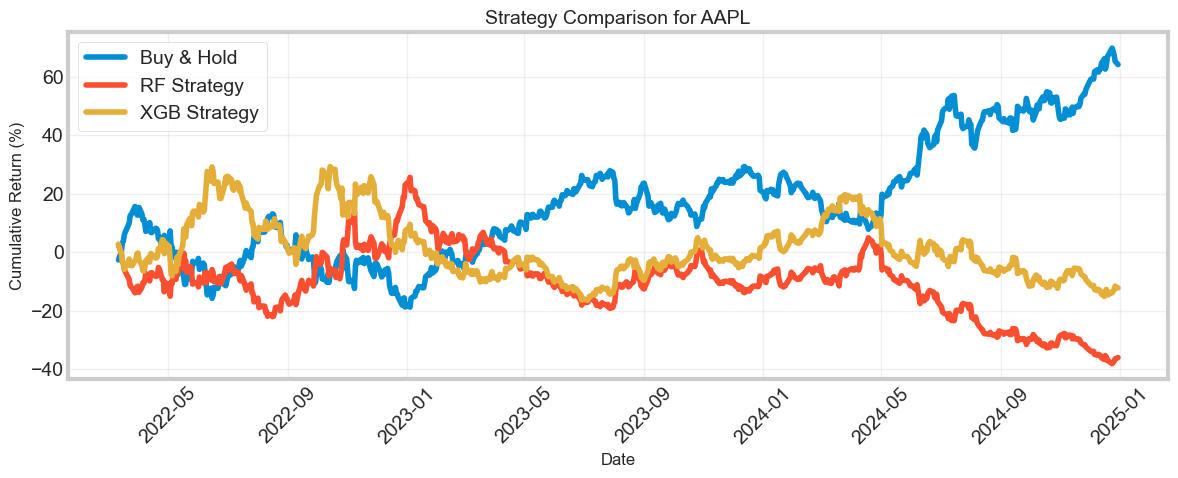


### Analyzing AMZN
Using features: Return_AMZN, Volatility_AMZN, Range_Pct_AMZN, MA20_AMZN, MA50_AMZN, MA200_AMZN, RSI_AMZN, Beta_AMZN, Day_of_Week, Month, Quarter

Random Forest: RMSE=3.0261, R²=-0.6662
XGBoost: RMSE=2.5443, R²=-0.1779


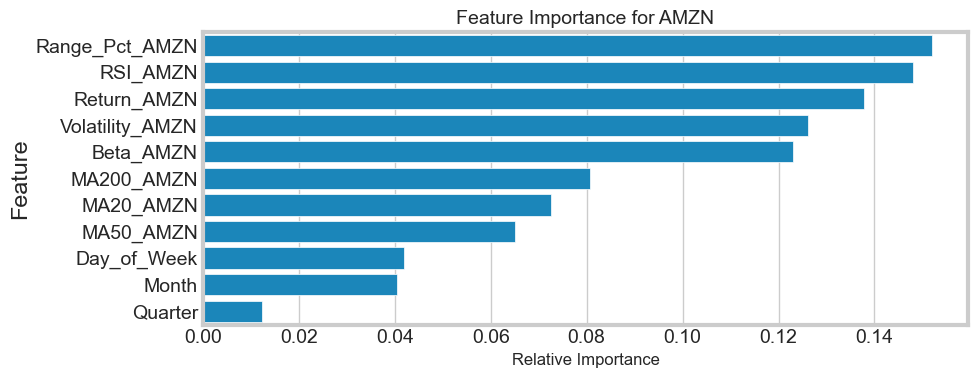


Strategy Performance:
                           Buy & Hold  RandomForest  XGBoost
Cumulative Return (%)           50.76        -66.14   -35.42
Annualized Return (%)           15.80        -32.09   -14.47
Annualized Volatility (%)       37.24         37.21    37.26
Sharpe Ratio                     0.00         -0.01    -0.00
Win Rate (%)                    51.91         46.81    49.79


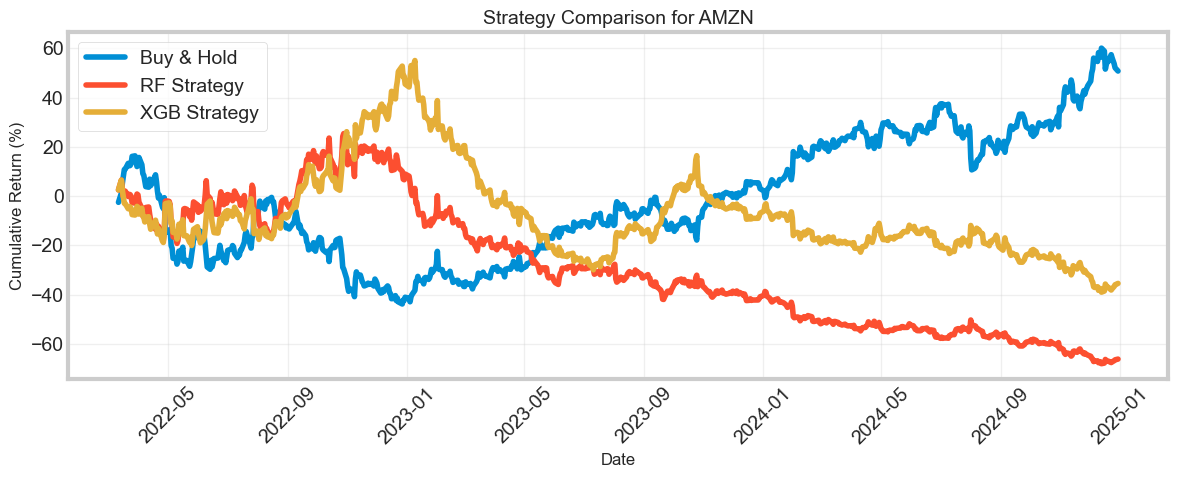


### Analyzing GOOGL
Using features: Return_GOOGL, Volatility_GOOGL, Range_Pct_GOOGL, MA20_GOOGL, MA50_GOOGL, MA200_GOOGL, RSI_GOOGL, Beta_GOOGL, Day_of_Week, Month, Quarter

Random Forest: RMSE=2.2464, R²=-0.2103
XGBoost: RMSE=2.3437, R²=-0.3174


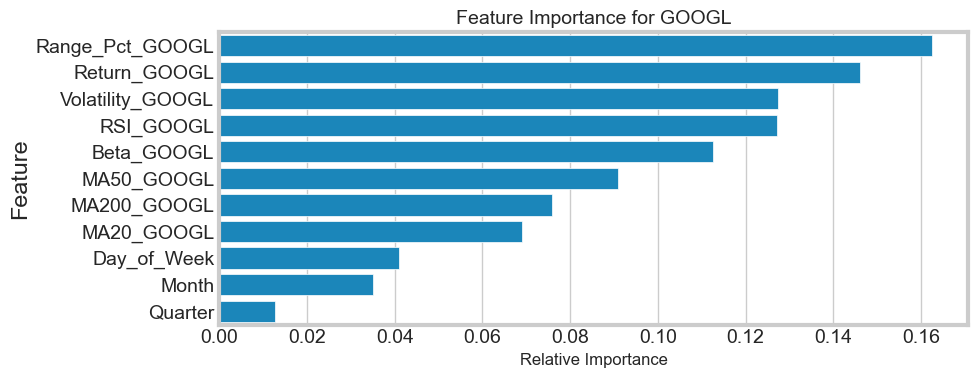


Strategy Performance:
                           Buy & Hold  RandomForest  XGBoost
Cumulative Return (%)           46.29        -28.20    -2.69
Annualized Return (%)           14.57        -11.17    -0.97
Annualized Volatility (%)       32.44         32.46    32.46
Sharpe Ratio                     0.00         -0.00    -0.00
Win Rate (%)                    53.19         47.52    47.23


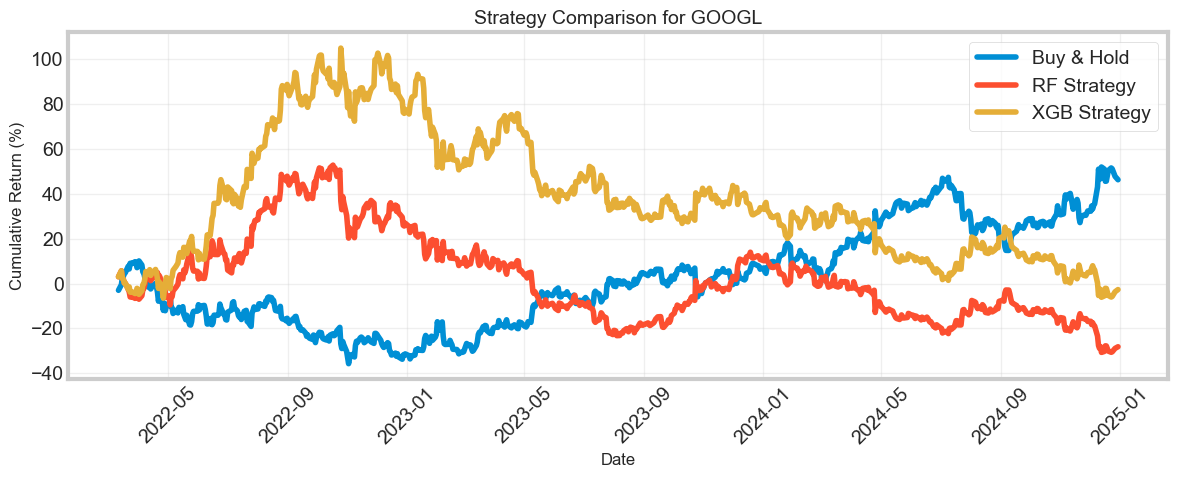


### Analyzing MSFT
Using features: Return_MSFT, Volatility_MSFT, Range_Pct_MSFT, MA20_MSFT, MA50_MSFT, MA200_MSFT, RSI_MSFT, Beta_MSFT, Day_of_Week, Month, Quarter

Random Forest: RMSE=2.2191, R²=-0.6964
XGBoost: RMSE=2.1314, R²=-0.5649


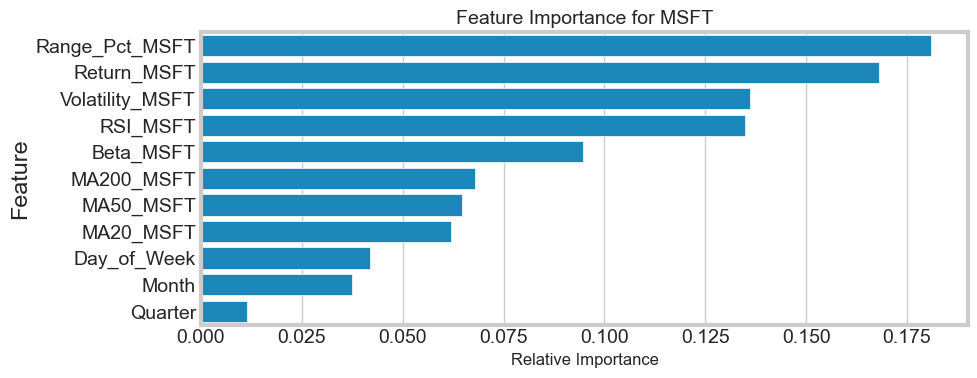


Strategy Performance:
                           Buy & Hold  RandomForest  XGBoost
Cumulative Return (%)           54.08         27.08    21.71
Annualized Return (%)           16.71          8.94     7.28
Annualized Volatility (%)       27.07         27.08    27.08
Sharpe Ratio                     0.01          0.00     0.00
Win Rate (%)                    52.20         49.50    49.93


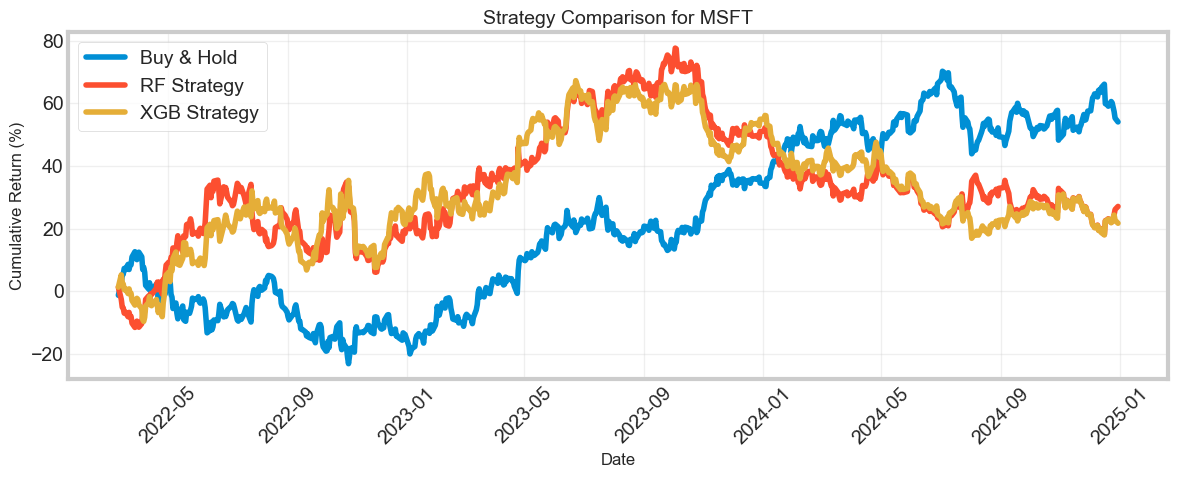


### Analyzing NVDA
Using features: Return_NVDA, Volatility_NVDA, Range_Pct_NVDA, MA20_NVDA, MA50_NVDA, MA200_NVDA, RSI_NVDA, Beta_NVDA, Day_of_Week, Month, Quarter

Random Forest: RMSE=3.9065, R²=-0.2903
XGBoost: RMSE=4.2643, R²=-0.5375


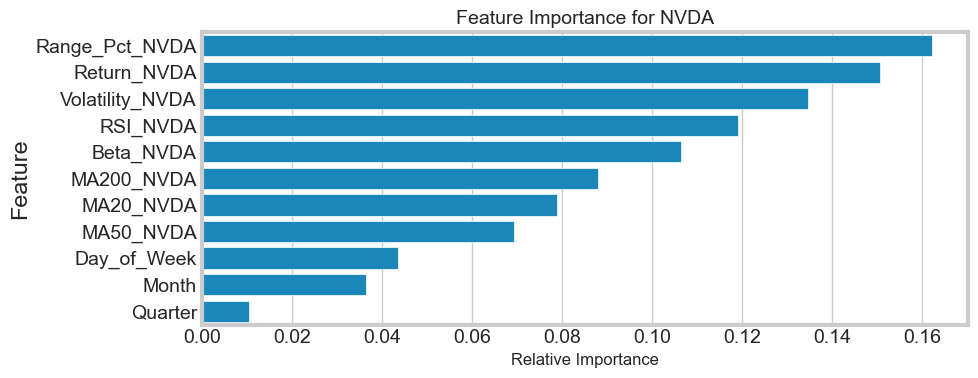


Strategy Performance:
                           Buy & Hold  RandomForest  XGBoost
Cumulative Return (%)          508.55        -42.83   -65.77
Annualized Return (%)           90.70        -18.12   -31.83
Annualized Volatility (%)       54.63         54.86    54.84
Sharpe Ratio                     0.02         -0.00    -0.01
Win Rate (%)                    53.90         48.94    48.23


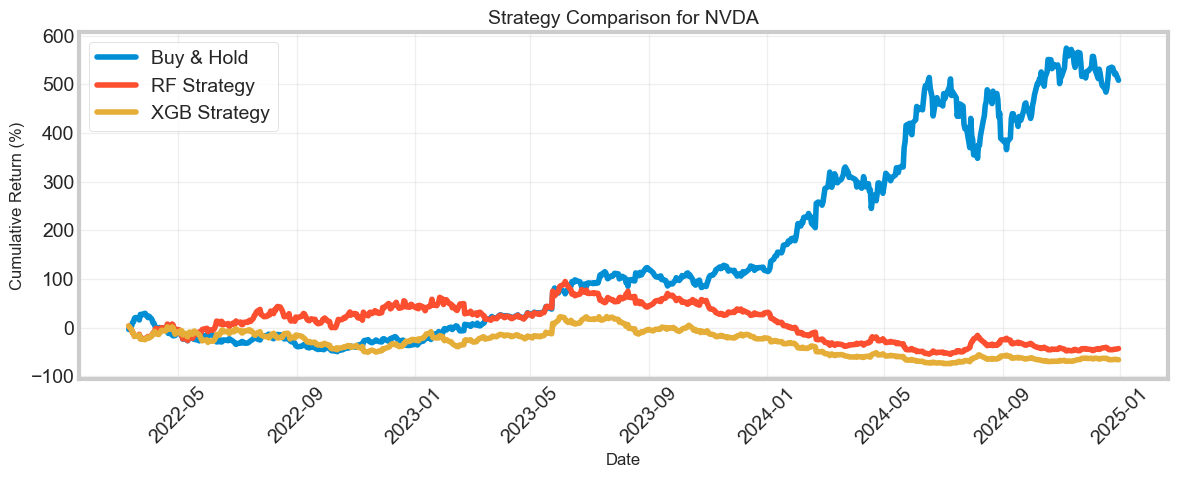

In [47]:
# 2. Analyze each company
print("\n## 2. Analyzing each company")

# Store results for all companies
company_results = {}

# Loop through each company
for company in companies:
    print(f"\n### Analyzing {company}")
    
    # Identify relevant columns
    price_col = f'Close_{company}'
    return_col = f'Return_{company}'
    
    # Select all available features for this company based on the dataset structure
    feature_columns = [
        f'Return_{company}',       # Daily return
        f'Volatility_{company}',   # Return volatility
        f'Range_Pct_{company}',    # Daily price range percentage
        f'MA20_{company}',         # 20-day moving average
        f'MA50_{company}',         # 50-day moving average
        f'MA200_{company}',        # 200-day moving average
        f'RSI_{company}',          # Relative Strength Index
        f'Beta_{company}',         # Market beta
        'Day_of_Week',             # Calendar features
        'Month',
        'Quarter'
    ]
    
    # Verify features exist
    available_features = [col for col in feature_columns if col in df.columns]
    if len(available_features) < 2:
        print(f"Warning: Not enough features found for {company}, skipping")
        continue
    
    print(f"Using features: {', '.join(available_features)}")
    
    # Prepare data
    try:
        X, y = prepare_prediction_data(df, available_features, return_col)
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, shuffle=False
        )
        
        # Evaluate Random Forest
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_results = evaluate_ml_model(
            X_train, X_test, y_train, y_test, 
            'RandomForest', rf_model
        )
        
        # Evaluate XGBoost
        xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
        xgb_results = evaluate_ml_model(
            X_train, X_test, y_train, y_test, 
            'XGBoost', xgb_model
        )
        
        # Print model performance
        print(f"\nRandom Forest: RMSE={rf_results['rmse']:.4f}, R²={rf_results['r2']:.4f}")
        print(f"XGBoost: RMSE={xgb_results['rmse']:.4f}, R²={xgb_results['r2']:.4f}")
        
        # Plot feature importance for Random Forest
        if rf_results['feature_importance'] is not None:
            plt.figure(figsize=(10, 4))
            sns.barplot(
                x='Importance', 
                y='Feature', 
                data=rf_results['feature_importance']
            )
            plt.title(f'Feature Importance for {company}', fontsize=14)
            plt.xlabel('Relative Importance', fontsize=12)
            plt.tight_layout()
            #plt.savefig(f'{company}_feature_importance.png')
            plt.show()
        
        # Create trading strategies
        test_dates = X_test.index
        
        # Compile results
        results_df = pd.DataFrame({
            'Actual': y_test,
            'RF_Pred': rf_results['predictions'],
            'XGB_Pred': xgb_results['predictions']
        }, index=test_dates)
        
        # Create signals
        results_df['RF_Signal'] = np.sign(results_df['RF_Pred'])
        results_df['XGB_Signal'] = np.sign(results_df['XGB_Pred'])
        
        # Calculate strategy returns
        results_df['RF_Strategy_Return'] = results_df['RF_Signal'] * results_df['Actual']
        results_df['XGB_Strategy_Return'] = results_df['XGB_Signal'] * results_df['Actual']
        
        # Calculate strategy metrics
        strategy_metrics = {
            'Buy & Hold': calculate_strategy_metrics(results_df['Actual']),
            'RandomForest': calculate_strategy_metrics(results_df['RF_Strategy_Return']),
            'XGBoost': calculate_strategy_metrics(results_df['XGB_Strategy_Return'])
        }
        
        # Save all results for this company
        company_results[company] = {
            'rf_results': rf_results,
            'xgb_results': xgb_results,
            'strategy_metrics': strategy_metrics,
            'results_df': results_df
        }
        
        # Print strategy performance
        metrics_df = pd.DataFrame(strategy_metrics)
        print("\nStrategy Performance:")
        print(metrics_df.round(2))
        
        # Plot strategy comparison
        results_df['Cumulative_Actual'] = (1 + results_df['Actual']/100).cumprod() - 1
        results_df['Cumulative_RF'] = (1 + results_df['RF_Strategy_Return']/100).cumprod() - 1
        results_df['Cumulative_XGB'] = (1 + results_df['XGB_Strategy_Return']/100).cumprod() - 1
        
        plt.figure(figsize=(12, 5))
        plt.plot(results_df.index, results_df['Cumulative_Actual']*100, label='Buy & Hold')
        plt.plot(results_df.index, results_df['Cumulative_RF']*100, label='RF Strategy')
        plt.plot(results_df.index, results_df['Cumulative_XGB']*100, label='XGB Strategy')
        plt.title(f'Strategy Comparison for {company}', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Cumulative Return (%)', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()
        #plt.savefig(f'{company}_strategy_comparison.png')
        plt.show()
        
    except Exception as e:
        print(f"Error analyzing {company}: {e}")



## 3. Cross-Company Performance Comparison

ML Model R² by Company:
        RF_R2  XGB_R2
AAPL  -0.2564 -0.1690
AMZN  -0.6662 -0.1779
GOOGL -0.2103 -0.3174
MSFT  -0.6964 -0.5649
NVDA  -0.2903 -0.5375

Strategy Returns by Company:
       BuyHold_Return  RF_Return  XGB_Return
AAPL            64.29     -36.12      -12.27
AMZN            50.76     -66.14      -35.42
GOOGL           46.29     -28.20       -2.69
MSFT            54.08      27.08       21.71
NVDA           508.55     -42.83      -65.77

Strategy Sharpe Ratios by Company:
       RF_Sharpe  XGB_Sharpe
AAPL       -0.01       -0.00
AMZN       -0.01       -0.00
GOOGL      -0.00       -0.00
MSFT        0.00        0.00
NVDA       -0.00       -0.01


<Figure size 1000x600 with 0 Axes>

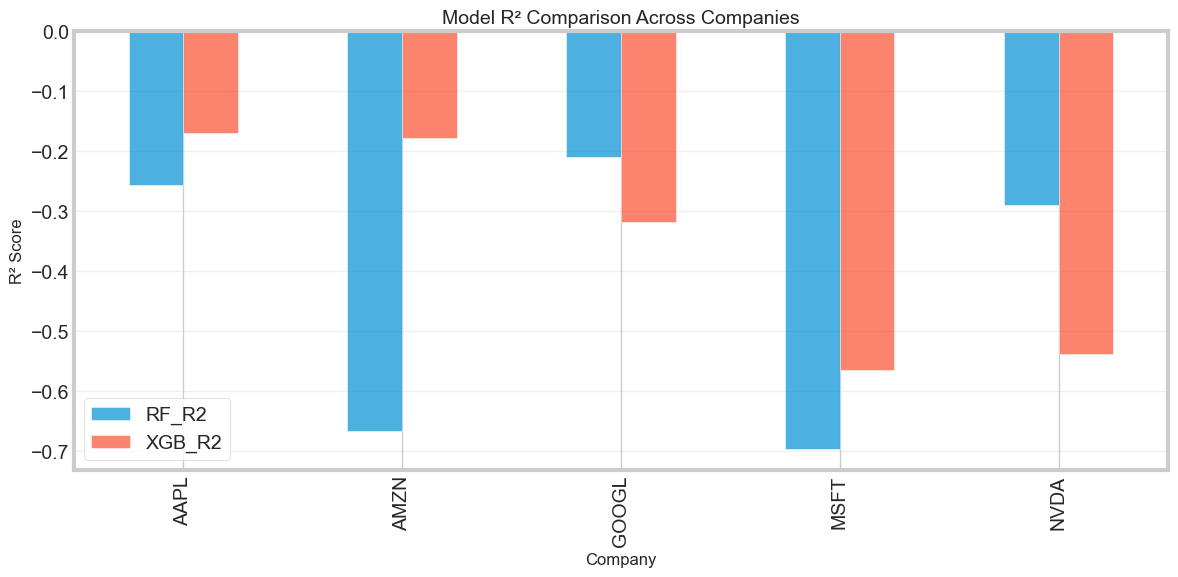

<Figure size 1200x600 with 0 Axes>

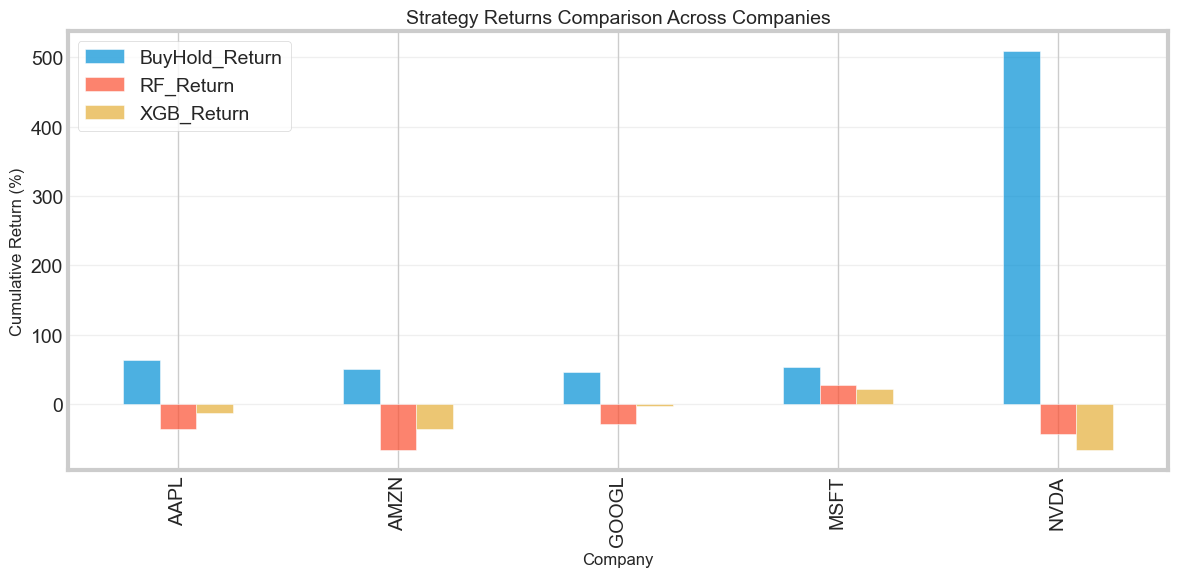

In [48]:
# 3. Compare performance across companies
print("\n## 3. Cross-Company Performance Comparison")

if len(company_results) > 0:
    # Collect performance metrics
    model_performance = {company: {} for company in company_results.keys()}
    strategy_performance = {company: {} for company in company_results.keys()}
    
    for company, results in company_results.items():
        # Model metrics
        model_performance[company]['RF_R2'] = results['rf_results']['r2']
        model_performance[company]['XGB_R2'] = results['xgb_results']['r2']
        
        # Strategy metrics
        strategy_performance[company]['BuyHold_Return'] = results['strategy_metrics']['Buy & Hold']['Cumulative Return (%)']
        strategy_performance[company]['RF_Return'] = results['strategy_metrics']['RandomForest']['Cumulative Return (%)']
        strategy_performance[company]['XGB_Return'] = results['strategy_metrics']['XGBoost']['Cumulative Return (%)']
        strategy_performance[company]['RF_Sharpe'] = results['strategy_metrics']['RandomForest']['Sharpe Ratio']
        strategy_performance[company]['XGB_Sharpe'] = results['strategy_metrics']['XGBoost']['Sharpe Ratio']
    
    # Convert to DataFrames
    model_df = pd.DataFrame(model_performance).T
    strategy_df = pd.DataFrame(strategy_performance).T
    
    # Display results
    print("\nML Model R² by Company:")
    print(model_df.round(4))
    
    print("\nStrategy Returns by Company:")
    print(strategy_df[['BuyHold_Return', 'RF_Return', 'XGB_Return']].round(2))
    
    print("\nStrategy Sharpe Ratios by Company:")
    print(strategy_df[['RF_Sharpe', 'XGB_Sharpe']].round(2))
    
    # Plot model R² comparison
    plt.figure(figsize=(10, 6))
    model_df.plot(kind='bar', alpha=0.7)
    plt.title('Model R² Comparison Across Companies', fontsize=14)
    plt.ylabel('R² Score', fontsize=12)
    plt.xlabel('Company', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    #plt.savefig('model_r2_comparison.png')
    plt.show()
    
    # Plot strategy returns comparison
    plt.figure(figsize=(12, 6))
    return_cols = ['BuyHold_Return', 'RF_Return', 'XGB_Return']
    strategy_df[return_cols].plot(kind='bar', alpha=0.7)
    plt.title('Strategy Returns Comparison Across Companies', fontsize=14)
    plt.ylabel('Cumulative Return (%)', fontsize=12)
    plt.xlabel('Company', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    #plt.savefig('strategy_returns_comparison.png')
    plt.show()


In [49]:
# 4. Find the best overall strategy
print("\n## 4. Best Strategies and Insights")

if len(company_results) > 0:
    # Find best model by company
    best_models = {}
    for company, results in company_results.items():
        rf_r2 = results['rf_results']['r2']
        xgb_r2 = results['xgb_results']['r2']
        best_model = 'RandomForest' if rf_r2 > xgb_r2 else 'XGBoost'
        best_r2 = max(rf_r2, xgb_r2)
        
        best_models[company] = {
            'best_model': best_model,
            'r2_score': best_r2
        }
    
    # Find best strategy by company
    best_strategies = {}
    for company, results in company_results.items():
        bh_return = results['strategy_metrics']['Buy & Hold']['Cumulative Return (%)']
        rf_return = results['strategy_metrics']['RandomForest']['Cumulative Return (%)']
        xgb_return = results['strategy_metrics']['XGBoost']['Cumulative Return (%)']
        
        best_ml_strategy = 'RandomForest' if rf_return > xgb_return else 'XGBoost'
        best_ml_return = max(rf_return, xgb_return)
        
        best_overall = 'Buy & Hold' if bh_return > best_ml_return else best_ml_strategy
        best_return = max(bh_return, best_ml_return)
        
        best_strategies[company] = {
            'best_strategy': best_overall,
            'return': best_return
        }
    
    # Display summary
    print("\nBest Model by Company:")
    for company, info in best_models.items():
        print(f"{company}: {info['best_model']} (R²: {info['r2_score']:.4f})")
    
    print("\nBest Strategy by Company:")
    for company, info in best_strategies.items():
        print(f"{company}: {info['best_strategy']} (Return: {info['return']:.2f}%)")
    
    # Overall best company to trade with ML
    strategy_gains = {}
    for company, results in company_results.items():
        bh_return = results['strategy_metrics']['Buy & Hold']['Cumulative Return (%)']
        best_ml_return = max(
            results['strategy_metrics']['RandomForest']['Cumulative Return (%)'],
            results['strategy_metrics']['XGBoost']['Cumulative Return (%)']
        )
        strategy_gains[company] = best_ml_return - bh_return
    
    best_company = max(strategy_gains.items(), key=lambda x: x[1])
    
    if best_company[1] > 0:
        print(f"\nMost ML-Tradable Company: {best_company[0]} (ML outperformed Buy & Hold by {best_company[1]:.2f}%)")
    else:
        print("\nNo ML strategy consistently outperformed Buy & Hold across companies")



## 4. Best Strategies and Insights

Best Model by Company:
AAPL: XGBoost (R²: -0.1690)
AMZN: XGBoost (R²: -0.1779)
GOOGL: RandomForest (R²: -0.2103)
MSFT: XGBoost (R²: -0.5649)
NVDA: RandomForest (R²: -0.2903)

Best Strategy by Company:
AAPL: Buy & Hold (Return: 64.29%)
AMZN: Buy & Hold (Return: 50.76%)
GOOGL: Buy & Hold (Return: 46.29%)
MSFT: Buy & Hold (Return: 54.08%)
NVDA: Buy & Hold (Return: 508.55%)

No ML strategy consistently outperformed Buy & Hold across companies


In [50]:
# 5. Key insights and next steps
print("\n## 5. Key Insights and Next Steps")

print("""
Key Insights:
1. ML model performance varies significantly across companies - what works for one may not work for others
2. Technical indicators have different predictive power for different stocks
3. Stock-specific modeling is important - one size doesn't fit all

Next Steps:
1. Feature Engineering:
   - Develop company-specific feature sets based on each stock's unique characteristics
   - Incorporate news sentiment data as different companies react differently to media

2. Model Improvement:
   - Implement time-series specific models like LSTM for each company
   - Use nested cross-validation for more robust performance estimation
   - Consider multi-task learning approaches that can learn across companies

3. Portfolio Strategy:
   - Develop a portfolio allocation strategy based on model confidence across companies
   - Implement risk-parity or other weighting schemes that account for varying model quality
   - Create a meta-model that selects the best model for each company

4. Expand Analysis:
   - Add more companies to increase diversification
   - Group companies by sector and analyze sector-specific patterns
   - Incorporate macroeconomic variables that may affect different companies in different ways
""")

print("\nMulti-company analysis complete!")


## 5. Key Insights and Next Steps

Key Insights:
1. ML model performance varies significantly across companies - what works for one may not work for others
2. Technical indicators have different predictive power for different stocks
3. Stock-specific modeling is important - one size doesn't fit all

Next Steps:
1. Feature Engineering:
   - Develop company-specific feature sets based on each stock's unique characteristics
   - Incorporate news sentiment data as different companies react differently to media

2. Model Improvement:
   - Implement time-series specific models like LSTM for each company
   - Use nested cross-validation for more robust performance estimation
   - Consider multi-task learning approaches that can learn across companies

3. Portfolio Strategy:
   - Develop a portfolio allocation strategy based on model confidence across companies
   - Implement risk-parity or other weighting schemes that account for varying model quality
   - Create a meta-model that selects th

Key Next Steps for Your Stock Prediction Project
Model Optimization

Fine-tune model parameters using GridSearchCV to find optimal settings
Implement feature selection to focus on the most predictive indicators
Create ensembles combining Random Forest and XGBoost for improved accuracy

Enhanced Feature Engineering

Derive new indicators from existing data (MA crossovers, RSI momentum)
Add interaction terms between features (e.g., RSI × Volatility)
Create lagged features to capture time dependencies

Trading Strategy Improvements

Optimize signal thresholds instead of using simple positive/negative rules
Implement dynamic position sizing based on prediction confidence
Add basic risk management rules (stop-loss, maximum exposure limits)

Better Validation Methods

Use walk-forward testing to simulate real trading conditions
Analyze performance across different market regimes (bull/bear/neutral)
Implement time series cross-validation for more reliable performance metrics

Portfolio Approach

Create a multi-stock strategy across all five tech companies
Adjust position sizes based on correlations to manage risk
Weight allocations toward stocks with stronger predictive signals